In [15]:
import pandas as pd

df1=pd.read_csv(r"C:\Users\El-Wattaneya\Desktop\BD_Project\BD_Project\audi.csv")

In [16]:
df1

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


# Main Problem in preprocessing


- check duplicated and handle it
- check Null Values 
- The problem initially was that missing data or NaN values were replaced with zeros.
- The first step I took was to revert those values back to NaN.

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [18]:
df1.head(10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4


In [19]:
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10663    False
10664    False
10665    False
10666    False
10667    False
Length: 10668, dtype: bool

In [20]:
df1.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [21]:
print (df1.isna().any(axis=1))

0        False
1        False
2        False
3        False
4        False
         ...  
10663    False
10664    False
10665    False
10666    False
10667    False
Length: 10668, dtype: bool


In [22]:
print(df1['price'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
10663    False
10664    False
10665    False
10666    False
10667    False
Name: price, Length: 10668, dtype: bool


In [23]:
# Drop duplicates in-place
df1.drop_duplicates(inplace=True) #### دي كانت بتحقظ فال csv ع طول

In [24]:
df1.duplicated().sum()

0

In [25]:
num_rows = df1.shape[0]
print(f"عدد الصفوف في الداتاست: {num_rows}")



عدد الصفوف في الداتاست: 10565


In [26]:
import numpy as np 
df1.replace(0, np.nan, inplace=True) #replace Zero with NaN


In [28]:
df1.isna().sum()

model             0
year              0
price             0
transmission      0
mileage           0
fuelType          0
tax             534
mpg               0
engineSize       52
dtype: int64

In [29]:
df1.tax.unique()

array([150.,  20.,  30., 145., 125., 200.,  nan, 205., 160., 235., 260.,
       325., 300., 165., 240., 565., 265., 135., 570., 555., 140., 330.,
       305., 155., 580., 290., 195., 115., 295., 220., 230., 280., 315.,
       535., 190., 540., 515.])

In [31]:
df1.tax.mean()

132.6119031003888

In [51]:
#replace with mean
mean_tax = df1['tax'].mean()
df1['tax'].fillna(mean_tax, inplace=True) 
df1

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150.0,55.4,1.4
1,5,2016,16500,0,36203,0,20.0,64.2,2.0
2,0,2016,11000,1,29946,2,30.0,55.4,1.4
3,3,2017,16800,0,25952,0,145.0,67.3,2.0
4,2,2019,17300,1,1998,2,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,2,2020,16999,1,4018,2,145.0,49.6,1.0
10664,2,2020,16999,1,1978,2,150.0,49.6,1.0
10665,2,2020,17199,1,609,2,150.0,49.6,1.0
10666,9,2017,19499,0,8646,2,150.0,47.9,1.4


In [52]:
df1.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [53]:
df1.engineSize.unique()

array([1.4       , 2.        , 1.        , 3.        , 1.6       ,
       1.8       , 1.5       , 4.        , 2.5       , 1.2       ,
       4.2       , 2.9       , 5.2       , 1.9       , 2.7       ,
       1.94253781, 3.2       , 4.1       , 6.3       ])

In [54]:
df1.engineSize.mean()

1.9425378103300674

In [55]:
#replace with mean

mean_engine = df1['engineSize'].mean()
df1['engineSize'].fillna(mean_engine, inplace=True)


In [56]:
df1.describe(include="all")

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10565.000000,10565,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000
unique,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.826787,NaN,22853.956081,1.084051,24955.960530,0.949172,132.611903,50.837558,1.942538
std,5.206099,NaN,11723.076767,0.764446,23448.942551,0.997427,60.826978,12.963337,0.587373
min,0.000000,NaN,1490.000000,0.000000,1.000000,0.000000,20.000000,18.900000,1.000000
25%,2.000000,NaN,15000.000000,0.000000,6000.000000,0.000000,132.611903,40.900000,1.500000
50%,4.000000,NaN,20000.000000,1.000000,19268.000000,0.000000,145.000000,49.600000,2.000000
75%,9.000000,NaN,27990.000000,2.000000,36668.000000,2.000000,145.000000,58.900000,2.000000


In [57]:
df1.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Visualization

<AxesSubplot: xlabel='year'>

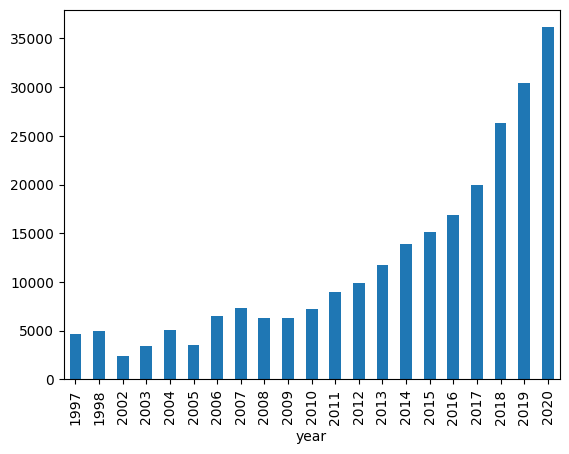

In [58]:
import pandas as pd

# تحويل القيم في العمود "price" إلى نوع رقمي
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

# تجميع البيانات بحسب السنة وحساب المتوسط للعمود "price"
result = df1.groupby('year')['price'].mean()

# رسم النتائج كرسم بياني من نوع "bar"
result.plot(kind="bar")
#متوسط اسعار السيارت عبر السنوات


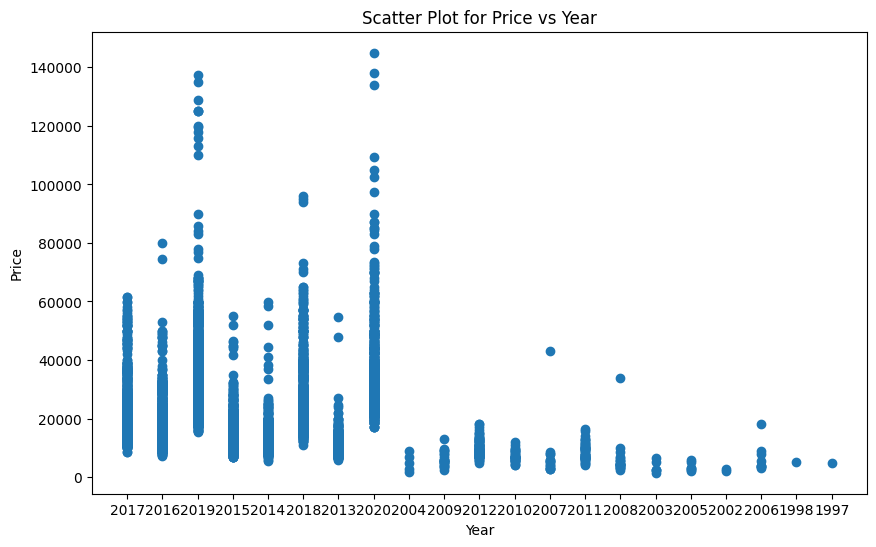

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df1['year'], df1['price'])
plt.title('Scatter Plot for Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()
#رسم Scatter Plot لعلاقة السعر بالعام:

#يظهر كيف يتغير السعر على مر السنوات.


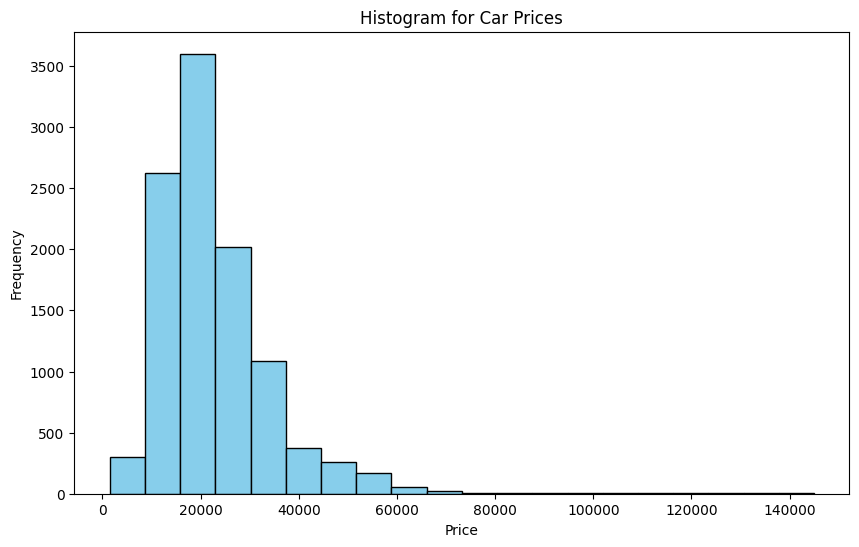

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(df1['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
#عدد السيارات في نفس الفئه السعريه

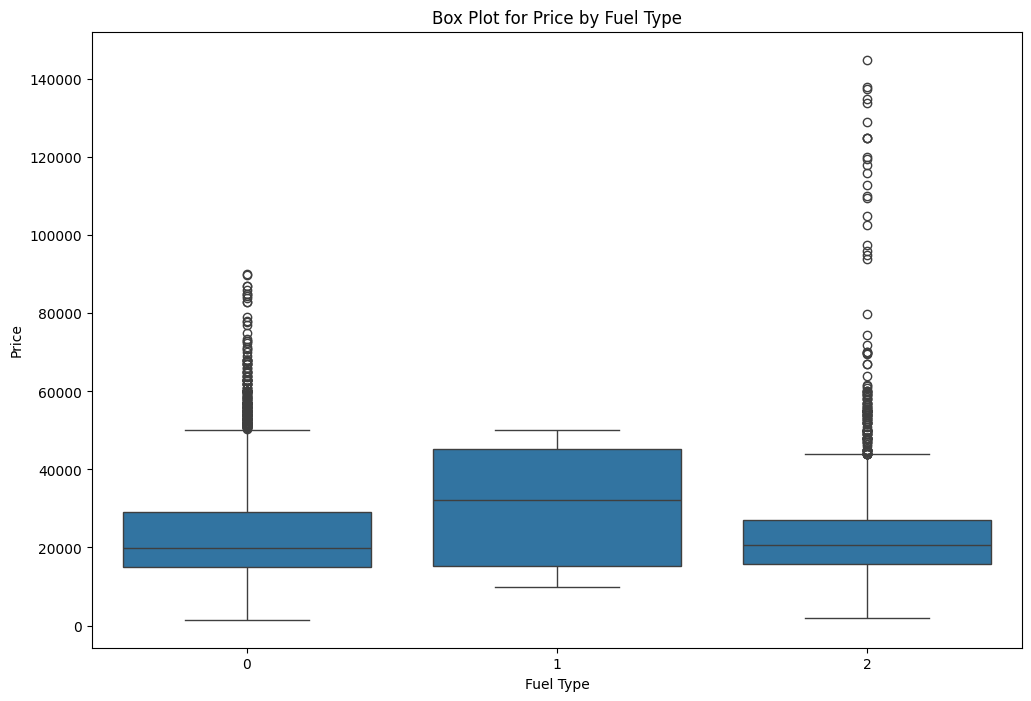

In [61]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='fuelType', y='price', data=df1)
plt.title('Box Plot for Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()
# فيه تلت انواع وقود بفئات سعريه مختلفة وكل ما حجم ال box  زاد كل ما سعر الوقود دا كان مختلف 

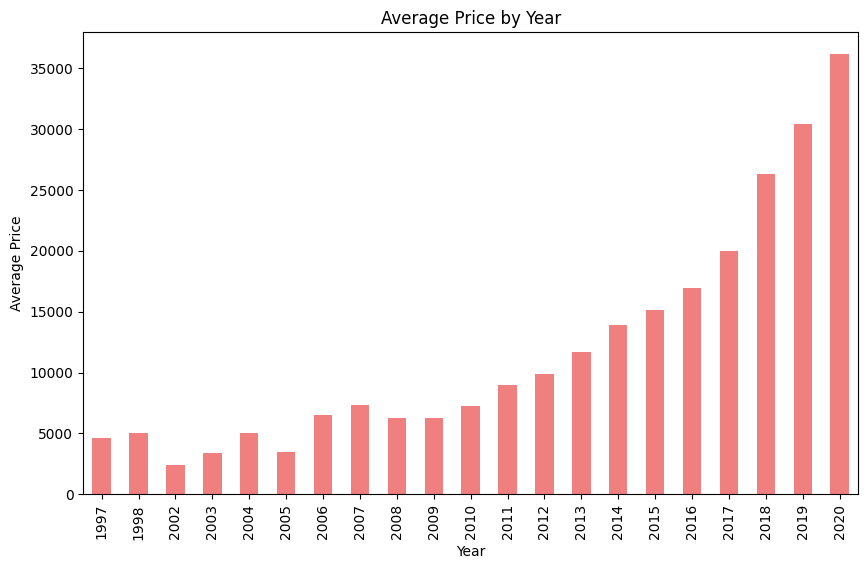

In [62]:
df1['year'] = df1['year'].astype(str)  # يمكن تحويل السنة إلى نص لتجنب تحويلها إلى فئات رقمية.

plt.figure(figsize=(10, 6))
df1.groupby('year')['price'].mean().plot(kind='bar', color='lightcoral')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


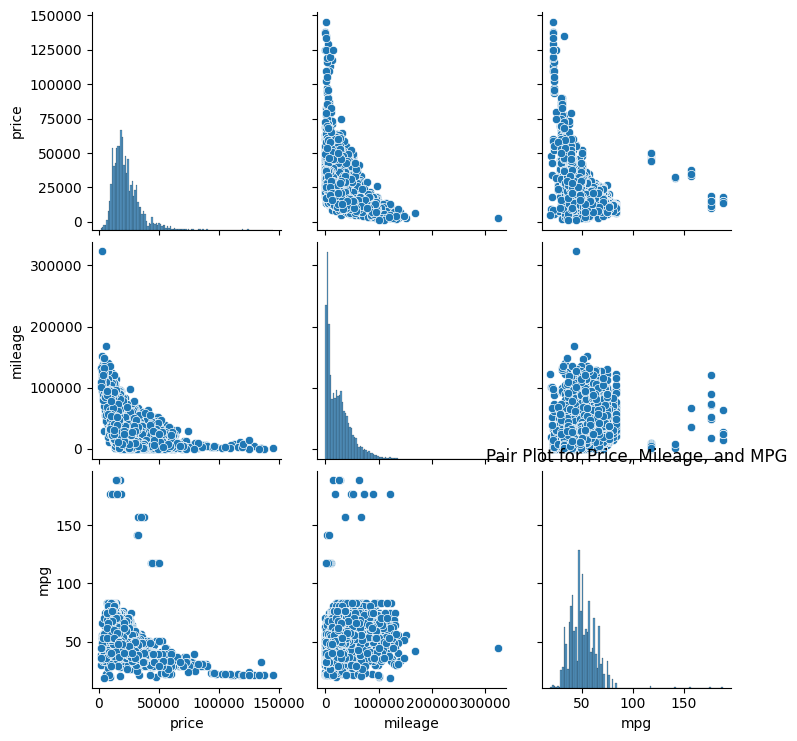

In [63]:
import seaborn as sns

sns.pairplot(df1[['price', 'mileage', 'mpg']])
plt.title('Pair Plot for Price, Mileage, and MPG')
plt.show()


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9516\1304966617.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transmission', data=df1, palette='viridis')


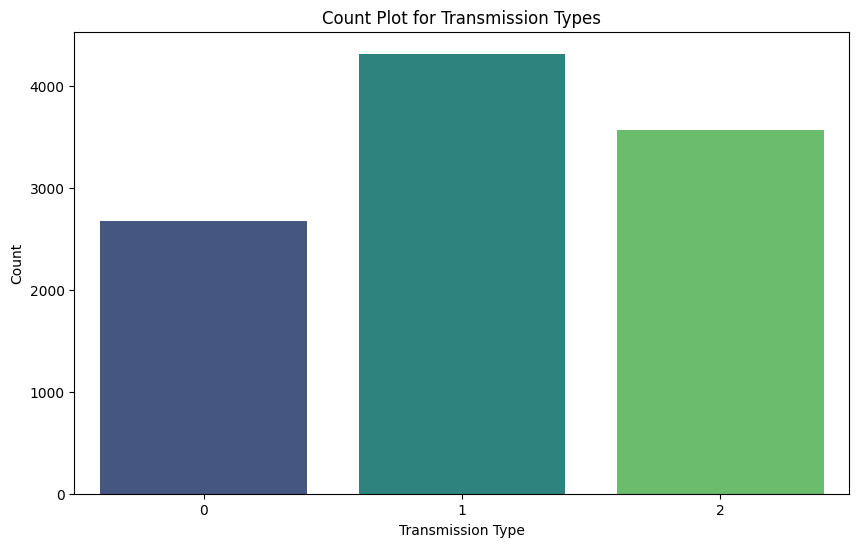

In [64]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df1, palette='viridis')
plt.title('Count Plot for Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()


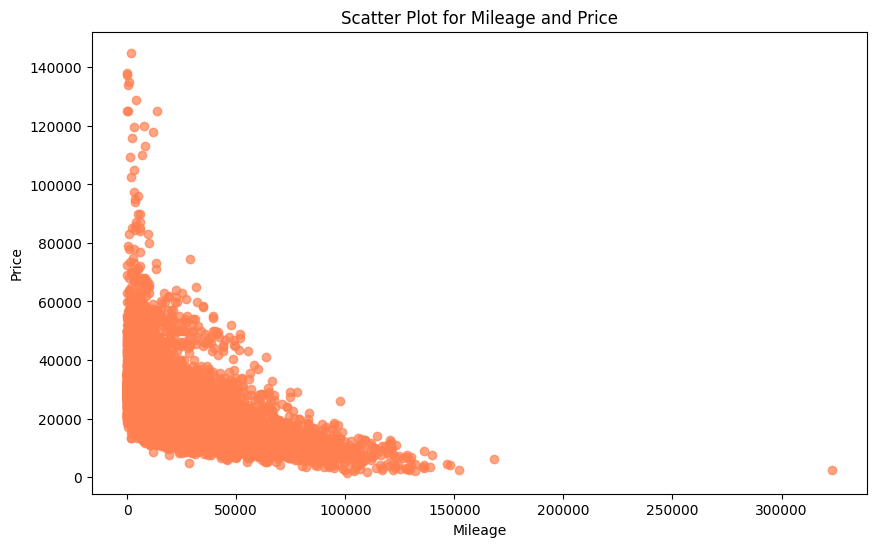

In [65]:
#ظهار العلاقة بين المسافة المقطوعة والسعر.
plt.figure(figsize=(10, 6))
plt.scatter(df1['mileage'], df1['price'], color='coral', alpha=0.7)
plt.title('Scatter Plot for Mileage and Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


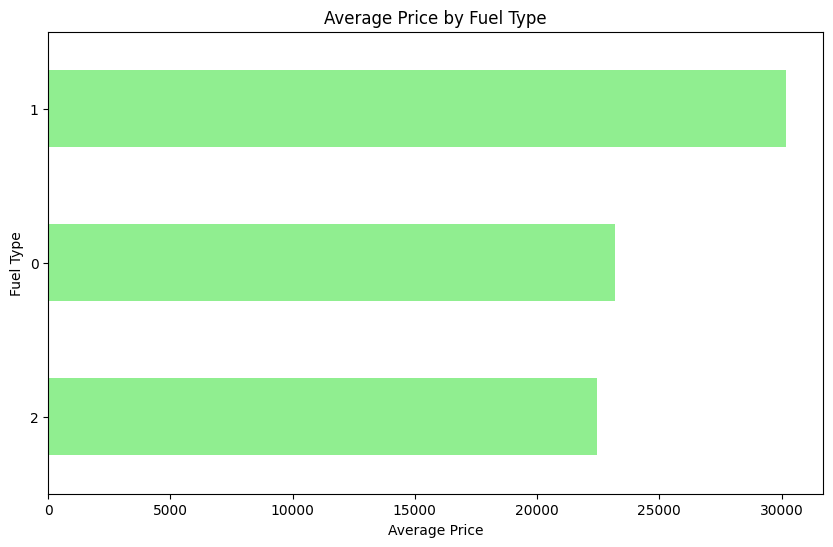

In [66]:
#عرض متوسط السعر لكل نوع وقود.

plt.figure(figsize=(10, 6))
df1.groupby('fuelType')['price'].mean().sort_values().plot(kind='barh', color='lightgreen')
plt.title('Average Price by Fuel Type')
plt.xlabel('Average Price')
plt.ylabel('Fuel Type')
plt.show()


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10565 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10565 non-null  int32  
 1   year          10565 non-null  object 
 2   price         10565 non-null  int64  
 3   transmission  10565 non-null  int32  
 4   mileage       10565 non-null  int64  
 5   fuelType      10565 non-null  int32  
 6   tax           10565 non-null  float64
 7   mpg           10565 non-null  float64
 8   engineSize    10565 non-null  float64
dtypes: float64(3), int32(3), int64(2), object(1)
memory usage: 701.6+ KB


In [68]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label = le.fit_transform(df1['model'])

columns_to_encode = ['model','transmission','fuelType']  

# Encode specific columns
for col in columns_to_encode:
    df1[col] = le.fit_transform(df1[col])


print(df1)

###################################

       model  year  price  transmission  mileage  fuelType    tax   mpg  \
0          0  2017  12500             1    15735         2  150.0  55.4   
1          5  2016  16500             0    36203         0   20.0  64.2   
2          0  2016  11000             1    29946         2   30.0  55.4   
3          3  2017  16800             0    25952         0  145.0  67.3   
4          2  2019  17300             1     1998         2  145.0  49.6   
...      ...   ...    ...           ...      ...       ...    ...   ...   
10663      2  2020  16999             1     4018         2  145.0  49.6   
10664      2  2020  16999             1     1978         2  150.0  49.6   
10665      2  2020  17199             1      609         2  150.0  49.6   
10666      9  2017  19499             0     8646         2  150.0  47.9   
10667      9  2016  15999             1    11855         2  150.0  47.9   

       engineSize  
0             1.4  
1             2.0  
2             1.4  
3             2.0  

# Normalization

In [69]:
x = df1.drop(['price'], axis=1)  # Check for case sensitivity


In [70]:
df1.columns = df1.columns.str.strip()  # Remove leading/trailing whitespaces from column names

In [71]:
y = df1['price']

In [72]:
x

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,1,15735,2,150.0,55.4,1.4
1,5,2016,0,36203,0,20.0,64.2,2.0
2,0,2016,1,29946,2,30.0,55.4,1.4
3,3,2017,0,25952,0,145.0,67.3,2.0
4,2,2019,1,1998,2,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,2,2020,1,4018,2,145.0,49.6,1.0
10664,2,2020,1,1978,2,150.0,49.6,1.0
10665,2,2020,1,609,2,150.0,49.6,1.0
10666,9,2017,0,8646,2,150.0,47.9,1.4


In [73]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame named 'df1'
# Replace 'df' with the actual name of your DataFrame

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize all values in the dataset
df = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Print the normalized DataFrame
print(df)


       model      year  transmission   mileage  fuelType       tax       mpg  \
0       0.00  0.869565           0.5  0.048712       1.0  0.232143  0.215466   
1       0.20  0.826087           0.0  0.112081       0.0  0.000000  0.267414   
2       0.00  0.826087           0.5  0.092709       1.0  0.017857  0.215466   
3       0.12  0.869565           0.0  0.080344       0.0  0.223214  0.285714   
4       0.08  0.956522           0.5  0.006183       1.0  0.223214  0.181228   
...      ...       ...           ...       ...       ...       ...       ...   
10560   0.08  1.000000           0.5  0.012437       1.0  0.223214  0.181228   
10561   0.08  1.000000           0.5  0.006121       1.0  0.232143  0.181228   
10562   0.08  1.000000           0.5  0.001882       1.0  0.232143  0.181228   
10563   0.36  0.869565           0.0  0.026765       1.0  0.232143  0.171192   
10564   0.36  0.826087           0.5  0.036700       1.0  0.232143  0.171192   

       engineSize  
0        0.075472  

In [74]:
y

0        12500
1        16500
2        11000
3        16800
4        17300
         ...  
10663    16999
10664    16999
10665    17199
10666    19499
10667    15999
Name: price, Length: 10565, dtype: int64

In [75]:
# تحديد المتغيرات المستقلة (features) والمتغير التابع (target)
from sklearn.model_selection import train_test_split
# تقسيم البيانات إلى مجموعة تدريب ومجموعة اختبار
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# يمكنك طباعة أحجام المجموعات للتحقق
print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')



Training set size: 8452
Testing set size: 2113


# Gradient Boosting Regressor

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Initialize the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = gb_regressor.predict(X_train)

# Calculate and print R-squared for the training set
r2_train = r2_score(y_train, y_train_pred)
print(f'R-squared on Training Set: {r2_train}')

# Make predictions on the test set
y_test_pred = gb_regressor.predict(X_test)

# Calculate and print R-squared for the test set
r2_test = r2_score(y_test, y_test_pred)
print(f'R-squared on Test Set: {r2_test}')


R-squared on Training Set: 0.9529633699785658
R-squared on Test Set: 0.9412887504033716


# Save best model as Pickle

In [77]:

import pickle

# Assuming you have a trained model named 'svr_model'
# Replace 'svr_model' with the actual name of your model

# Save the model to a file using pickle
with open('gb_regressor.pkl', 'wb') as file:
    pickle.dump(gb_regressor, file)


In [78]:
X_train

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
9330,0.44,0.956522,0.0,0.000028,0.0,0.223214,0.086777,0.377358
9298,0.16,0.956522,0.0,0.024966,0.0,0.223214,0.185950,0.188679
334,0.08,0.956522,0.0,0.006985,0.0,0.223214,0.197166,0.113208
1613,0.00,0.826087,0.5,0.092316,1.0,0.201093,0.285714,0.000000
5121,0.12,0.739130,1.0,0.088263,0.0,0.187500,0.228453,0.188679
...,...,...,...,...,...,...,...,...
5734,0.08,0.956522,1.0,0.018898,0.0,0.232143,0.185950,0.188679
5191,0.36,0.956522,1.0,0.019706,1.0,0.223214,0.080283,0.188679
5390,0.40,0.695652,1.0,0.153558,0.0,0.428571,0.133412,0.377358
860,0.36,1.000000,1.0,0.001622,1.0,0.223214,0.129870,0.094340


In [79]:
y_test

3683     12691
2923     47816
6826     21450
8151     13849
3982     12990
         ...  
9097     19499
8670      8395
324      32895
10060    36000
1102     20251
Name: price, Length: 2113, dtype: int64

# GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a base RandomForestRegressor model
rf_base = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
rf_grid = GridSearchCV(estimator=rf_base, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit the grid search model
rf_grid.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", rf_grid.best_params_)

# Get the best model
best_rf_model_grid = rf_grid.best_estimator_

# Evaluate the model
y_pred_tuned_grid = best_rf_model_grid.predict(X_test)
r_squared_tuned_grid = best_rf_model_grid.score(X_test, y_test)
# Calculate R-squared
r_squared = best_rf_model_grid .score(X_train, y_train)

print(f'R-squared train: {r_squared}')


print(f'R-squared (Tuned Model - Grid Search): {r_squared_tuned_grid}')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
R-squared train: 0.9872479501378734
R-squared (Tuned Model - Grid Search): 0.954735051973179


In [84]:
# Calculate R-squared
r_squared = best_rf_model_grid.score(X_test, y_test)

print(f'R-squared: {r_squared}')


R-squared: 0.954735051973179


# decisionTreeRegressor

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [86]:
# Predict on the test set
y_pred = dt_regressor.predict(X_test)


In [87]:
# Calculate and print the Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 3584.9543689632974


In [88]:
# Calculate R-squared
r_squared =dt_regressor.score(X_train, y_train)

print(f'R-squared train: {r_squared}')


R-squared train: 0.9989374666076153


In [89]:
# Assuming you have already trained the Decision Tree model (dt_regressor)
r_squared = dt_regressor.score(X_test, y_test)

print(f'R-squared test: {r_squared}')


R-squared test: 0.909192677593727


# Lasso 

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the Lasso model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_lasso = lasso_model.predict(X_train)

# Calculate and print R-squared for the training set with Lasso
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
print(f'R-squared on Training Set (Lasso): {r2_train_lasso}')

# Make predictions on the test set
y_test_pred_lasso = lasso_model.predict(X_test)

# Calculate and print R-squared for the test set with Lasso
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
print(f'R-squared on Test Set (Lasso): {r2_test_lasso}')





R-squared on Training Set (Lasso): 0.8037817918060621
R-squared on Test Set (Lasso): 0.8041095700784113


# KNeighborsRegressor
Worst

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_regressor.fit(X_train, y_train)

# Evaluate the model
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (KNeighborsRegressor): {rmse}')
print(f'R-squared: {r2}')


Root Mean Squared Error (KNeighborsRegressor): 3468.446977741844
R-squared: 0.9149990606030601


# Using Pycaret

In [92]:
from pycaret.regression import *

# Assuming df1 is your DataFrame
regression_setup = setup(df1, target='price', session_id=42)

# Compare and evaluate regression models
best_model = compare_models()

# Tune the best model
tuned_model = tune_model(best_model)

# Evaluate the tuned model
evaluate_model(tuned_model)

# Make predictions on new data
predict_model(tuned_model)

# Finalize the model for deployment
final_model = finalize_model(tuned_model)

# Save the model
save_model(final_model, 'regression_model')


,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(10565, 9)"
4,Transformed data shape,"(10565, 29)"
5,Transformed train set shape,"(7395, 29)"
6,Transformed test set shape,"(3170, 29)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1573.9772,5439358.5584,2329.2368,0.9588,0.1168,0.0772,0.1180
et,Extra Trees Regressor,1600.3367,5798550.8308,2405.5029,0.9559,0.1057,0.0765,0.4690
rf,Random Forest Regressor,1659.2350,6457452.7839,2532.5387,0.9515,0.1195,0.0829,0.5870
lightgbm,Light Gradient Boosting Machine,1693.9928,6938711.7298,2625.4262,0.9481,0.1270,0.0832,0.1710
gbr,Gradient Boosting Regressor,2116.5855,9098614.9983,3014.8600,0.9314,0.1482,0.1038,0.2930
dt,Decision Tree Regressor,2125.7690,10856369.5006,3284.4629,0.9182,0.1565,0.1056,0.0380
ridge,Ridge Regression,3356.3280,24835870.0412,4966.6565,0.8153,0.2621,0.1703,0.0300
lasso,Lasso Regression,3359.0090,24884334.8248,4971.2441,0.8150,0.2601,0.1706,0.1010
llar,Lasso Least Angle Regression,3358.8317,24878965.7865,4970.6827,0.8150,0.2599,0.1706,0.0320
br,Bayesian Ridge,3358.5992,24890696.9895,4972.1038,0.8149,0.2585,0.1711,0.0340


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1723.9186,7705456.5089,2775.8704,0.9395,0.1323,0.0848
1,1635.2609,5637570.7094,2374.3569,0.9559,0.1011,0.0760
2,1723.0262,6321013.9898,2514.1627,0.9556,0.1341,0.0880
3,1634.9219,5212779.6443,2283.1513,0.9582,0.1435,0.0808
4,1664.5969,5402745.4265,2324.3807,0.9551,0.1228,0.0813
5,1743.1913,7317934.8001,2705.1682,0.9579,0.1330,0.0886
6,1734.1613,6486968.2203,2546.9527,0.9598,0.2879,0.0841
7,1648.9159,5884176.1196,2425.7321,0.9567,0.1168,0.0813
8,1709.6330,5769240.0316,2401.9242,0.9511,0.1350,0.0897


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,1606.6236,6029326.5999,2455.4687,0.9582,0.1264,0.0775


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['model', 'transmission', 'mileage',
                                              'fuelType', 'tax', 'mpg',
                                              'engineSize'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['year'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(inclu...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
       

# Xgboost